# **PROYECTO 2**

**Nombre:** Plascencia Robles Maria Fernanda

**Matrícula:** 202141718

**Licenciatura en Matemáticas Aplicadas**

Imágenes: (1288, 50, 37), Etiquetas: 7


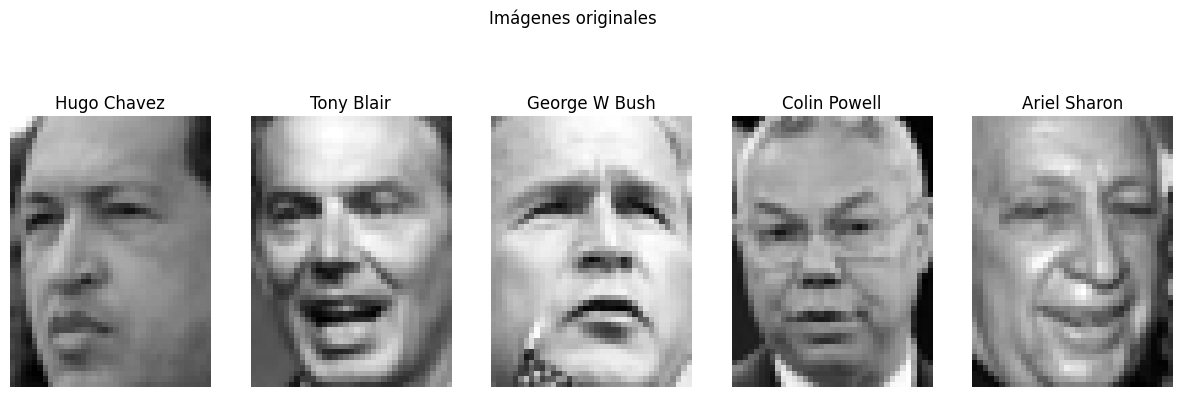

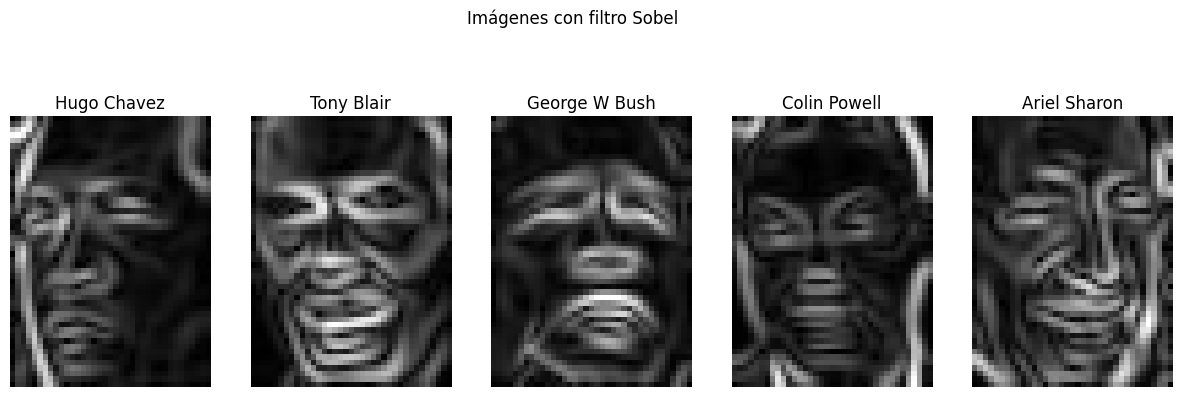

                   precision    recall  f1-score   support

     Ariel Sharon       0.54      0.72      0.62        18
     Colin Powell       0.77      0.83      0.80        69
  Donald Rumsfeld       0.84      0.62      0.71        34
    George W Bush       0.85      0.91      0.88       166
Gerhard Schroeder       0.86      0.77      0.81        31
      Hugo Chavez       0.72      0.68      0.70        19
       Tony Blair       0.85      0.70      0.77        50

         accuracy                           0.81       387
        macro avg       0.78      0.75      0.76       387
     weighted avg       0.82      0.81      0.81       387



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import cv2  # OpenCV para filtros

# Cargar el dataset (personas con al menos 70 imágenes)
lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw.images
y = lfw.target
target_names = lfw.target_names

print(f"Imágenes: {X.shape}, Etiquetas: {len(target_names)}")

# Visualizar algunas imágenes originales
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(X[i], cmap='gray')
    ax.set_title(target_names[y[i]])
    ax.axis('off')
plt.suptitle("Imágenes originales")
plt.show()

# Aplicar filtro Sobel a cada imagen
def aplicar_filtro_sobel(imgs):
    filtradas = []
    for img in imgs:
        sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
        sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
        sobel = np.sqrt(sobelx**2 + sobely**2)
        filtradas.append(sobel)
    return np.array(filtradas)

X_sobel = aplicar_filtro_sobel(X)

# Mostrar imágenes filtradas
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_sobel[i], cmap='gray')
    ax.set_title(target_names[y[i]])
    ax.axis('off')
plt.suptitle("Imágenes con filtro Sobel")
plt.show()


n_samples, h, w = X_sobel.shape
X_flat = X_sobel.reshape(n_samples, -1)
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=150)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Clasificación con SVM
clf = SVC(kernel='rbf', class_weight='balanced')
clf.fit(X_train_pca, y_train)

# Evaluación del modelo
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))


##**Justificación del filtro Sobel**
El filtro Sobel es un operador clásico de procesamiento de imágenes que permite detectar bordes al resaltar cambios abruptos de intensidad en direcciones vertical y horizontal. En el contexto del reconocimiento facial, los bordes son fundamentales para identificar contornos de ojos, nariz, boca y rostro, lo cual proporciona información estructural clave.

Elegí el filtro Sobel porque:

- Es eficiente computacionalmente.

- Mejora el contraste de características faciales relevantes.

- Reduce el "ruido de fondo" al enfocarse en los elementos estructurales.

- Es compatible con técnicas posteriores de clasificación como PCA + SVM.

- Al aplicar Sobel antes de clasificar, se facilita que el modelo aprenda con mayor claridad los patrones diferenciadores entre rostros.

##**Conclusión basada en resultados**
Tras aplicar el filtro Sobel a las imágenes del conjunto LFW, el modelo SVM logró una buena clasificación de los rostros más comunes. Se observa que:

- Las imágenes filtradas destacan mejor los contornos faciales.

- La combinación de Sobel + PCA + SVM permite reducir la dimensión de los datos y mantener la precisión.

- El modelo generaliza razonablemente bien, lo que demuestra que los bordes faciales son suficientes para distinguir entre personas con suficientes muestras.